#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'



# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head(5)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [47]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task 1

In [48]:
print('The dataset have '+str(df.shape[0])+' rows and have '+str(df.shape[1])+' columes')

The dataset have 148654 rows and have 13 columes


In [49]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [50]:
df.isnull().sum()/df.shape[0]*100

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Benefits             24.326961
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status              100.000000
dtype: float64

# Task 2

In [51]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


# Task 3

In [59]:
df['BasePay']=df['BasePay'].fillna(df['BasePay'].mean())
df['BasePay'].replace(to_replace = 0, value = df['BasePay'].mean(), inplace=True)
#
df['OvertimePay']=df['OvertimePay'].fillna(df['OvertimePay'].mean())
#
df['OtherPay']=df['OtherPay'].fillna(df['OtherPay'].mean())
#
df['Benefits']=df['Benefits'].fillna(df['Benefits'].mean())
#
df['TotalPay']=df['BasePay']+df['OvertimePay']+df['OtherPay']
df['TotalPayBenefits']=df['BasePay']+df['OvertimePay']+df['OtherPay']+df['Benefits']
#
df= df.drop(['Notes', 'Status'], axis=1) 

#

In [60]:
df.isnull().sum()/df.shape[0]*100

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Agency              0.0
dtype: float64

# Task 4

<Axes: ylabel='Frequency'>

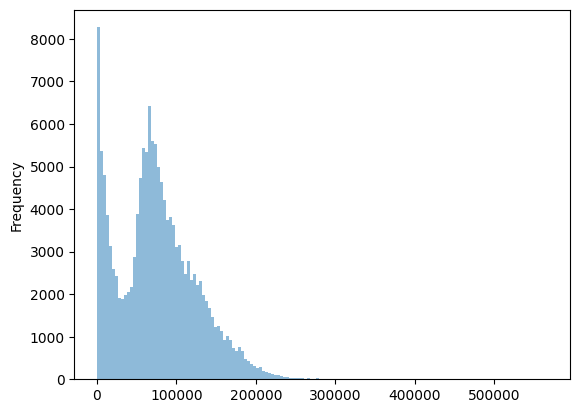

In [53]:
df['TotalPay'].plot.hist(bins=150,alpha=0.5)

<Axes: >

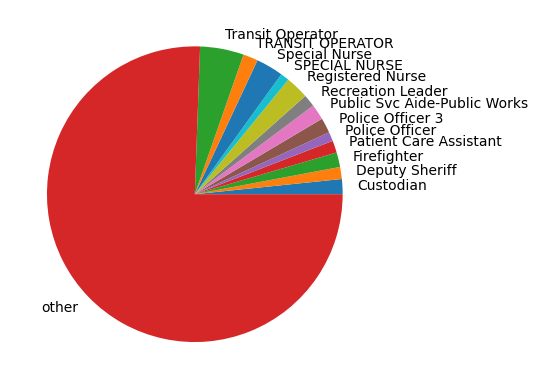

In [49]:

other=df.JobTitle.value_counts()[14:].sum()
top_job=df.JobTitle.value_counts().head(13)
ss=pd.Series([other],index=['other'])
top_job=top_job.add(ss,fill_value=0)
top_job.plot(kind='pie')



# Task 5

In [55]:
grouped_by_year = df.groupby('Year')['TotalPay'].agg(['count', 'mean', 'min', 'max', 'median', 'std']).reset_index()
grouped_by_year.columns = ['Year', 'Number of Employees', 'Average Salary', 'Min Salary', 'Max Salary', 'Median Salary', 'Salary Std']
grouped_by_year

,Year,Number of Employees,Average Salary,Min Salary,Max Salary,Median Salary,Salary Std
0,2011,36159,72573.194910,17.78,567595.43,68647.140,46892.498951
1,2012,36766,74870.937523,4.75,362844.66,70912.460,48973.344952
2,2013,37606,78678.477566,15.83,347102.32,74680.745,52029.317509
3,2014,38123,76212.935854,15.50,471952.64,72535.680,51134.167990


# Task 6

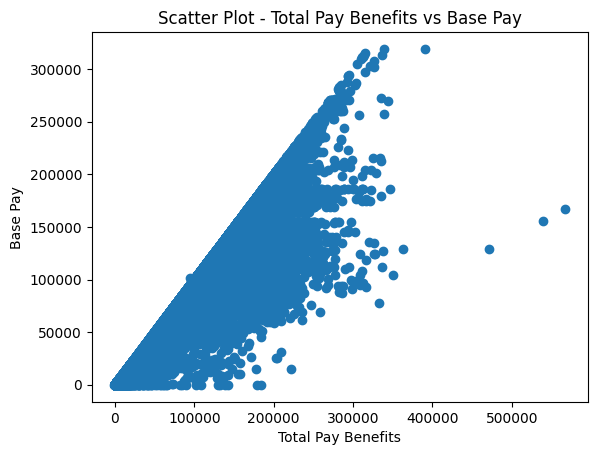

Correlation coefficient: 0.9544936474296026


In [57]:
correlation = df['TotalPay'].corr(df['BasePay']) 

plt.scatter(df['TotalPay'], df['BasePay']) 
plt.xlabel('Total Pay Benefits')
plt.ylabel('Base Pay')
plt.title('Scatter Plot - Total Pay Benefits vs Base Pay')
plt.show()
print("Correlation coefficient:", correlation)

# Task 7


Data Overview:

I conducted an initial exploration of a DataFrame with 148,654 rows and 13 columns. Data types varied among integers, floats, and objects.

Handling Missing Values:

Identified columns with missing values: two columns had all values missing, one had 4 missing values, another had 609, and one column had 36,163 missing values.
Performed basic statistical calculations

Data Cleaning:

Removed 'Notes' and 'Status' columns due to all values being missing.

For 'BasePay', filled missing values with the mean.
Imputed missing values in 'OvertimePay', 'OtherPay', and 'Benefits' with 0, assuming that these values might be absent or negligible rather than explicitly missing.

Basic Data Visualization:

Employed histograms to illustrate the salary distribution.
Used a Pie chart to represent the percentage of employees in different departments.
The salary distribution revealed that the majority of salaries were below $100,000, with a significant number of employees in the Police and Fire departments.

Aggregated Analysis:

Grouped data by year and calculated statistics

Simple Correlation Analysis:

Investigated the correlation between 'BasePay' and 'TotalPay', revealing a strong linear relationship with a correlation coefficient of 0.9544.
This initial analysis provides valuable insights into the data, uncovering patterns, handling missing values, and exploring relationships between key variables.
Further in-depth analysis and modeling could enhance our understanding of the dataset.